In [1]:
import kwant
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### Graphene with zigzag

In [3]:
sin30, cos30 = (1/2, sqrt(3)/2)
#zigzag above, armchair leads
graphene = kwant.lattice.general([(1, 0), (sin30, cos30)],
                                 [(0, 0), (0, 1 / sqrt(3))])
a, b = graphene.sublattices

hoppings = (((0, 0), a, b), ((0, 1), a, b), ((-1, 1), a, b))

In [4]:
graphene.prim_vecs

array([[ 1.       ,  0.       ],
       [ 0.5      ,  0.8660254]])

In [5]:
scattering_region = np.ones((10, 20))

In [31]:
def geomShape(pos):
    #x, y = pos
    if pos[0] < 0 or pos[1] < 0:
        return False
    try:
        a=1
        # rather round()?
        return scattering_region[int(pos[0] / a), int(pos[1] / a)]
    except IndexError:
        return False
    
def lead1_shape(pos):
    y = pos[1]
    a=1
    if y < 0:
        return False
    try:
        return scattering_region[0, int(y / a)]
    except IndexError:
        return False    
    
def make_system():
    sys = kwant.Builder()
    sys[graphene.shape(geomShape, (0,0))] = 1
    sys[graphene.neighbors()] = 1
    #sys.eradicate_dangling()
    #sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1

    sym1 = kwant.TranslationalSymmetry(graphene.vec((-1, 0)))
    sym1.add_site_family(a, other_vectors=[(-1, 2)])
    sym1.add_site_family(b, other_vectors=[(-1, 2)])
    
    lead1 = kwant.Builder(sym1)
    lead1[graphene.shape(lead1_shape, (1, 1))] = 1
    lead1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings]] = -1
    #lead1[graphene.neighbors()] = 1
    
    sys.attach_lead(lead1)
    sys.attach_lead(lead1.reversed())
    return(sys)


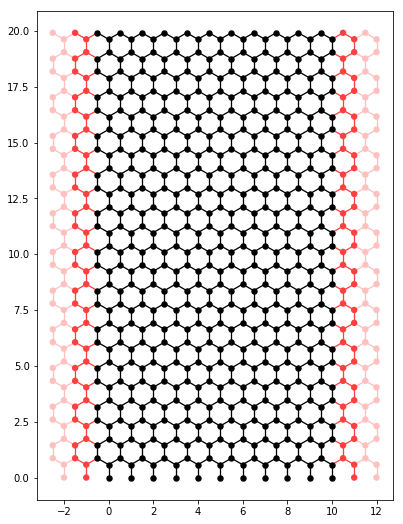

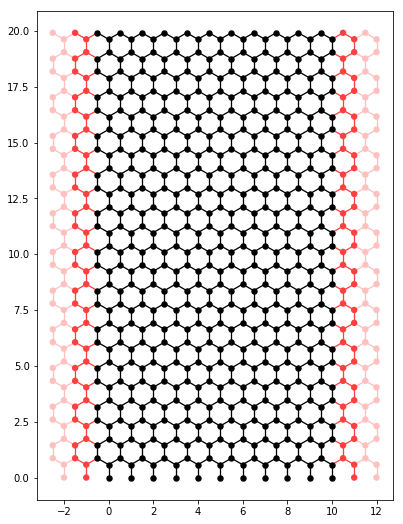

In [30]:
system = make_system()
kwant.plot(system, fig_size=(16, 9))

In [24]:
at=1
bilayer =  kwant.lattice.general([(at*np.sqrt(3)/2, at*1/2), (0, at*1)],
                                 [(0, 0.0), (at*1 / (2*np.sqrt(3)), at*1/2), 
                                  (-at*1/(2*np.sqrt(3)), at*1/2), (0, 0)])

a1, b1, a2, b2 = bilayer.sublattices

In [25]:
bilayer.prim_vecs

array([[ 0.8660254,  0.5      ],
       [ 0.       ,  1.       ]])

In [248]:
def make_bilayer():
    hoppings1 = (((0, 0), a1, b1), ((0, 1), a1, b1), ((1, 0), a1, b1)) 
    hoppings2 = (((0, 0), a2, b2), ((0, -1), a2, b2), ((1, -1), a2, b2))
    
    sys = kwant.Builder()
    sys[bilayer.shape(geomShape, (0,0))] = 1
    #sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = 1
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = 1
    sys[kwant.builder.HoppingKind((0, 0), a1, b2) ] = 1
    
    #sym1 = kwant.TranslationalSymmetry(bilayer.vec((-2, 1)))
    #lead_1 = kwant.Builder(sym1)
    #lead_1[bilayer.shape(lead1_shape, (0, 0))] = 1
    #lead_1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = 1
    #lead_1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = 1
    #lead_1[kwant.builder.HoppingKind((0, 0), a1, b2)] =1 

    #sys.attach_lead(lead_1)
    return(sys)    

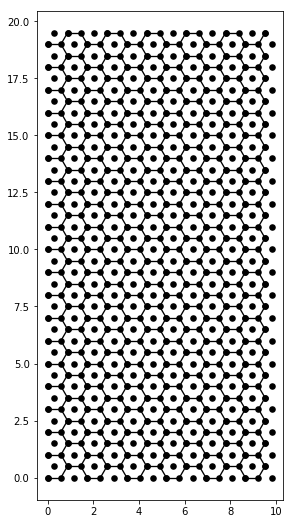

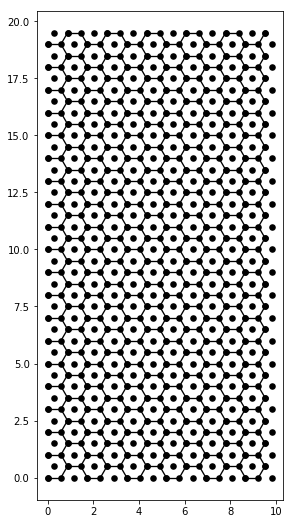

In [249]:
bilayer_system = make_bilayer()
kwant.plot(bilayer_system, fig_size=(16,9))

In [26]:
zigzag = kwant.lattice.general([(1, 0), (sin30, cos30)],
                                 [(0, 0), (0, 1/sqrt(3)), 
                                  (0, 0), (1/2, 1/(2*sqrt(3)))])
#at=1
#zigzag =  kwant.lattice.general([(at*np.sqrt(3)/2, at*1/2), (0, at*1)],
#                                 [(0, 0.0), (at*1 / (2*np.sqrt(3)), at*1/2), 
#                                  (-at*1/(2*np.sqrt(3)), at*1/2), (0, 0)])

a1, b1, a2, b2 = zigzag.sublattices

In [27]:
def sites_symbols(site):
    if site.family in [a1, b1]:
        return('o')
    else:
        return('s')

In [28]:
def family_colors(site):
    #delta = 1.0 - potential(site.pos[0], site.pos[1])[0][0]
    colors = {a1: 'black', b1: 'grey', a2: 'red', b2: 'blue'}
    return(colors[site.family])
    

In [54]:
def lead2_shape(pos):
    y = pos[1]
    a=1
    if y < 0:
        return False
    try:
        return scattering_region[-1, int(y / a)]
    except IndexError:
        return False   

In [57]:
def make_zigzag():
    hoppings1 = (((0, 0), a1, b1), ((-1, 1), a1, b1), ((0, 1), a1, b1))
    hoppings2 = (((0,0), a2, b2), ((1,0), a2, b2), ((0, 1), a2, b2))
    
    sys = kwant.Builder()
    sys[zigzag.shape(geomShape, (0,0))] = 1
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = 1
    sys[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = 1
    sys[kwant.builder.HoppingKind((0, 0), a1, b2) ] = 1

    sym1 = kwant.TranslationalSymmetry(zigzag.vec((-1,0)))
    sym1.add_site_family(a1, other_vectors=[(-1, 2)])
    sym1.add_site_family(b1, other_vectors=[(-1, 2)])
    sym1.add_site_family(a2, other_vectors=[(-1, 2)])
    sym1.add_site_family(b2, other_vectors=[(-1, 2)])
    
    lead_1 = kwant.Builder(sym1)
    lead_1[zigzag.shape(lead1_shape, (0, 0))] = 1
    lead_1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = 1
    lead_1[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = 1
    lead_1[kwant.builder.HoppingKind((0, 0), a1, b2)] = 1 
    
    sym2 = kwant.TranslationalSymmetry(zigzag.vec((1, 0)))
    sym2.add_site_family(a1, other_vectors=[(1, -2)])
    sym2.add_site_family(b1, other_vectors=[(1, -2)])
    sym2.add_site_family(a2, other_vectors=[(1, -2)])
    sym2.add_site_family(b2, other_vectors=[(1, -2)])    
    
    lead_2 = kwant.Builder(sym2)
    lead_2[zigzag.shape(lead2_shape, (0, 0))] = 1
    lead_2[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings1]] = 1
    lead_2[[kwant.builder.HoppingKind(*hopping) for hopping in hoppings2]] = 1
    lead_2[kwant.builder.HoppingKind((0,0), a1, b2)] = 1
    
    sys.attach_lead(lead_1)
    sys.attach_lead(lead_2)
    #sys.attach_lead(lead_1.reversed())
    return(sys)

#for hop in permutations([1, 2, -1, 1, 0], 2):
#    print(hop)
#    zizgaz_system = make_zigzag(hop)
#    kwant.plot(zizgaz_system, fig_size=(16,9), site_color=family_colors)#, site_symbol=sites_symbols)



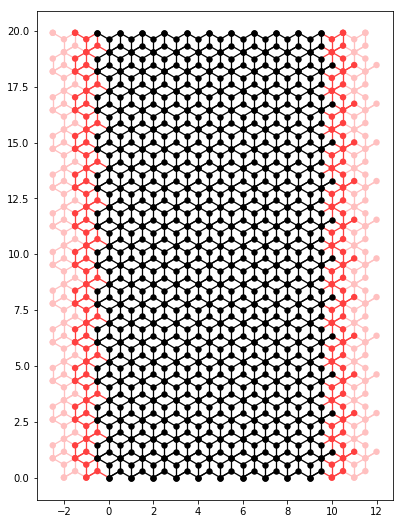

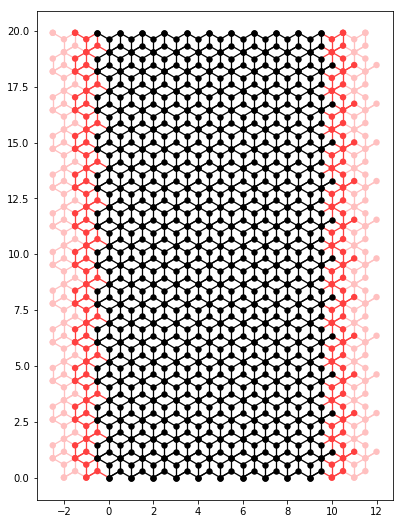

In [58]:
zizgaz_system = make_zigzag()
kwant.plot(zizgaz_system, fig_size=(16,9))#, site_color=family_colors)#, site_symbol=sites_symbols)